In [8]:
import numpy as np
import util

from linear_model import LinearModel

In [9]:
train_path1 = './data/ds1_train.csv'
eval_path1 = './data/ds1_valid.csv'
train_path2 = './data/ds2_train.csv'
eval_path2 = './data/ds2_valid.csv'

Validation accuracy:  0.83
Validation accuracy:  0.91
Validation accuracy:  0.95


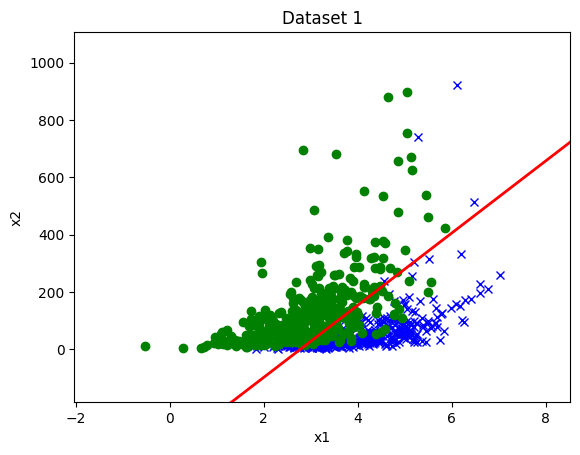

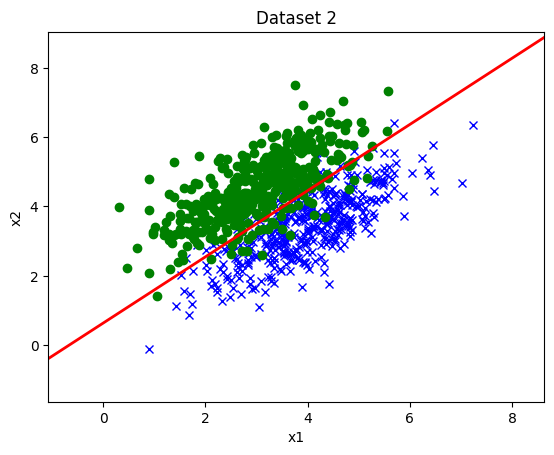

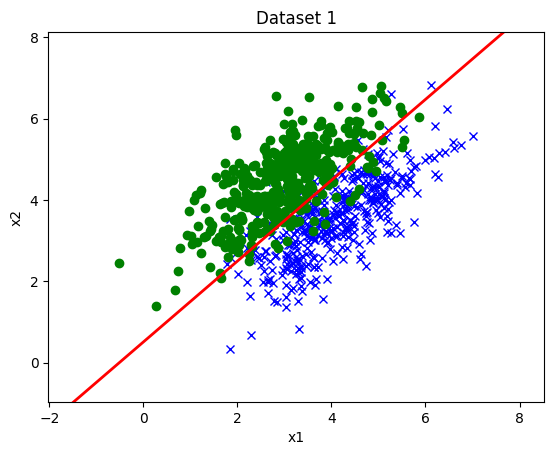

In [12]:
def main(train_path, eval_path, pred_path, set_label, logarithm=False):
    """Problem 1(e): Gaussian discriminant analysis (GDA)

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
        set_label: Label of the training/validation sets that we are using.
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=False) #x_0 = 0 now
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=False)

    if logarithm:
        transformed_x_train = np.stack(arrays=[x_train[:, 0], np.log(x_train[:, 1])], axis=1)
        transformed_x_eval = np.stack(arrays=[x_eval[:, 0], np.log(x_eval[:, 1])], axis=1)
        #Initialise our Gaussian
        clf = GDA()
        clf.fit(transformed_x_train, y_train)
        predicted_labels = clf.predict(transformed_x_eval)

    else:
        #Initialise our Gaussian
        clf = GDA()
        clf.fit(x_train, y_train)
        predicted_labels = clf.predict(x_eval)

    correct = 0 #number of correct labels
    total = len(y_eval)

    for i, label in enumerate(predicted_labels):
        if predicted_labels[i] == y_eval[i]:
            correct += 1 #adds one to the "correct" count if the label prediction is accurate.

    val_accuracy = correct / total
    print("Validation accuracy: ", val_accuracy)

    theta = [clf.theta_0,]
    for theta_i in clf.theta:
        theta.append(theta_i)
    
    if logarithm:
        util.plot(x=transformed_x_train, y=y_train, theta=theta, set_label=set_label)
    else:
        util.plot(x=x_train, y=y_train, theta=theta, set_label=set_label)



class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """

        #Number of training examples in each class
        no_examples = len(y)
        no_0 = no_examples - np.sum(y)
        no_1 = no_examples - no_0 # = np.sum(y)

        #Indices of examples in each class
        indices_0 = np.where(y==0)
        indices_1 = np.where(y==1)
        
        #Calculate the probability of y being in class 1- phi (bernoulli parameter)
        self.phi = no_1 / no_examples

        #Calculate mean of classes 0 and 1 by summing vectors and dividing by class population
        self.mu0 = np.mean(x[indices_0], axis=0)
        self.mu1 = np.mean(x[indices_1], axis=0)

        #Calculate the covariance matrix
        self.cov_mat = np.zeros((x.shape[1], x.shape[1]))
        for i in range(no_examples):
            if y[i] == 0:
                a = x[i] - self.mu0
            else:
                a = x[i] - self.mu1

            self.cov_mat += np.outer(a, a)

        self.cov_mat = np.multiply(1/no_examples, self.cov_mat) #normalise by dividing by size of training set
        self.cov_mat_inv = np.linalg.inv(self.cov_mat)

        #Calculate theta
        self.theta = np.dot(np.transpose(self.mu1-self.mu0), self.cov_mat_inv)
        self.theta_0 = np.log(self.phi / (1-self.phi)) + 0.5 * (np.dot(self.mu0, np.dot(self.cov_mat_inv, self.mu0))) - \
            0.5 * (np.dot(self.mu1, np.dot(self.cov_mat_inv, self.mu1)))


    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """

        no_examples = x.shape[0]
        predicted_labels = []

        for i in range(no_examples):
            logit = np.dot(self.theta, x[i]) + self.theta_0 #calculate the logit
            if logit >= 0:
                predicted_labels.append(1)
            else:
                predicted_labels.append(0)

        return predicted_labels


main(train_path=train_path1, eval_path=eval_path1, pred_path='.', set_label=1)
main(train_path=train_path2, eval_path=eval_path2, pred_path='.', set_label=2)
main(train_path=train_path1, eval_path=eval_path1, pred_path='.', set_label=1, logarithm=True)